In [32]:
library(clusterProfiler)
library(dplyr)
library(msigdbr)
setwd("/data")
library(org.Mm.eg.db)
library(ggplot2)

In [14]:
m_df_hallmark <- msigdbr(species = "Mus musculus", category="H") %>% dplyr::select(gs_name, gene_symbol)
#m_df_go <- msigdbr(species = "Mus musculus", category="C5") %>% dplyr::select(gs_name, gene_symbol)
m_df_curated <- msigdbr(species = "Mus musculus", category="C2") %>% dplyr::select(gs_name, gene_symbol)

In [20]:
files <- sub(".csv$","",  list.files("csv/de/", full.names=FALSE))

[1] "epithelial.cd40vsctrl"   "epithelial.combovscd40" 
 [3] "epithelial.combovsctrl"  "epithelial.combovstak"  
 [5] "epithelial.takvscd40"    "epithelial.takvsctrl"   
 [7] "macrophages.cd40vsctrl"  "macrophages.combovscd40"
 [9] "macrophages.combovsctrl" "macrophages.combovstak" 
[11] "macrophages.takvscd40"   "macrophages.takvsctrl"  
[13] "tcells.cd40vsctrl"       "tcells.combovscd40"     
[15] "tcells.combovsctrl"      "tcells.combovstak"      
[17] "tcells.takvscd40"        "tcells.takvsctrl"

In [ ]:
for (n in files){
    df <- read.csv(paste0("csv/de/", n, ".csv"))
    original_gene_list <- df$logFC
    names(original_gene_list) <- df$X
    gene_list<-na.omit(original_gene_list)
    gene_list = sort(gene_list, decreasing = TRUE)
    gse_GO <- gseGO(geneList=gene_list, 
                ont ="ALL",
                keyType="SYMBOL",
                minGSSize = 10, 
                maxGSSize = 800,
                pvalueCutoff = 0.05,
                verbose = TRUE,
                OrgDb =org.Mm.eg.db)
    write.csv(gse_GO[], paste0("csv/gsea/", n, "_GO.csv"))
    ridgeplot(gse_GO, showCategory = 20)
    ggsave(paste0("figs/gsea/", n, "_GO.png"), height=12, width=8)
    gse_h<-GSEA(gene_list,
                TERM2GENE=m_df_hallmark,
                minGSSize=10)
    write.csv(gse_h[], paste0("csv/gsea/", n, "_hallmark.csv"))
    ridgeplot(gse_h, showCategory = 20)
    ggsave(paste0("figs/gsea/", n, "_hallmark.png"), height=12, width=8)
    gse_curated<-GSEA(gene_list,
            TERM2GENE=m_df_curated,
            minGSSize=10)
    write.csv(gse_curated[], paste0("csv/gsea/", n, "_currated.csv"))
    ridgeplot(gse_curated, showCategory = 20)
    ggsave(paste0("figs/gsea/", n, "_gse_curated.png"), height=12, width=8)   
}

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 19 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

Picking joint bandwidth of 0.202

preparing geneSet collections...

GSEA analysis...

Warning message

In [27]:
df <- read.csv("csv/de/epithelial.cd40vsctrl.csv")
original_gene_list <- df$logFC
names(original_gene_list) <- df$X
gene_list<-na.omit(original_gene_list)
gene_list = sort(gene_list, decreasing = TRUE)
gse_GO <- gseGO(geneList=gene_list, 
                ont ="ALL",
                keyType="SYMBOL",
                minGSSize = 3, 
                maxGSSize = 800,
                pvalueCutoff = 0.05,
                verbose = TRUE,
                nPerm = 10000,
                OrgDb =org.Mm.eg.db)



preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 27 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



,ONTOLOGY,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0035456,BP,GO:0035456,response to interferon-beta,35,0.8900552,2.503273,1.000000e-10,3.520113e-08,3.191576e-08,421,"tags=63%, list=4%, signal=61%",Ifitm3/Gbp7/Ifi47/Gbp3/Gbp2/Ifit1/Gbp6/Ifi204/Xaf1/Iigp1/Oas1a/Bst2/Ifit3/Mndal/Ifi203/Irgm2/Igtp/Stat1/Irgm1/Gm12185/Oas1c/Ifi211
GO:0035458,BP,GO:0035458,cellular response to interferon-beta,29,0.8949125,2.456016,1.000000e-10,3.520113e-08,3.191576e-08,421,"tags=66%, list=4%, signal=63%",Gbp7/Ifi47/Gbp3/Gbp2/Ifit1/Gbp6/Ifi204/Iigp1/Oas1a/Ifit3/Mndal/Ifi203/Irgm2/Igtp/Stat1/Irgm1/Gm12185/Oas1c/Ifi211
GO:0009617,BP,GO:0009617,response to bacterium,314,0.6737007,2.455154,1.000000e-10,3.520113e-08,3.191576e-08,755,"tags=28%, list=7%, signal=27%",Il1b/S100a9/S100a8/Ifi44/Gbp7/Fabp4/Lyz2/Pde4b/Lilrb4a/Cd80/Fcer1g/Ccdc80/Gbp3/Casp4/Cxcl10/Gbp2/Syk/Rgs1/Nlrp3/Ifit1/Usp18/Cxcl3/Isg15/Cd52/Gbp6/Dhx58/Gbp9/Oas3/Trim30a/Ifi204/P2rx7/Ptgs2/Cxcl2/Trim30d/Oas2/Iigp1/Oas1a/Ncf2/Fam20a/Gbp8/Ifit3/Herc6/Ly6a/Slpi/Mndal/Psmb9/Arg2/Irgm2/Cd274/Mef2c/Igtp/Il12rb2/Cxcl1/Mx2/Stat1/Rnf213/Irgm1/Fkbp5/H2-M3/Pdcd1lg2/BC018473/Stab1/Rab29/Amy1/Myo1f/B2m/AA467197/Trim12c/Eif2ak2/Adgrl2/Syt11/Serpinb9/Stap1/Tap2/Oas1c/Ifi211/Slfn2/Macrod2/Lsm5/Plaat3/Alpk1/Snhg1/Pde2a/Nod2/Gstp1/Zfp36/Rpl39/Resf1/Lgals9
GO:0034341,BP,GO:0034341,response to interferon-gamma,83,0.7462930,2.407017,1.000000e-10,3.520113e-08,3.191576e-08,227,"tags=27%, list=2%, signal=26%",Ifitm3/Gbp7/Gbp3/H2-Aa/H2-Ab1/H2-Q7/H2-Eb1/Cd74/Gbp2/Ccl3/Sp100/Gbp6/Ccl4/Gbp9/Bst2/Gbp8/Irgm2/Parp14/Igtp/Stat1/Irgm1/Parp9
GO:0019882,BP,GO:0019882,antigen processing and presentation,68,0.7607492,2.383522,1.000000e-10,3.520113e-08,3.191576e-08,1058,"tags=46%, list=10%, signal=41%",Ctss/Fcer1g/H2-Q6/H2-Aa/H2-Ab1/H2-Q7/H2-Eb1/Cd74/Psmb8/Thbs1/H2-Q4/Fcgr3/Tap1/Psmb9/H2-M3/B2m/Rftn1/Tap2/H2-T24/H2-T22/Cd1d1/Icam1/H2-DMb1/H2-D1/Nod2/H2-T23/Tapbp/H2-K1/Rab8b/Psme1/Psme2
GO:0042742,BP,GO:0042742,defense response to bacterium,109,0.7048112,2.354368,1.000000e-10,3.520113e-08,3.191576e-08,402,"tags=28%, list=4%, signal=28%",Il1b/Gbp7/Lyz2/Fcer1g/Gbp3/Casp4/Gbp2/Syk/Nlrp3/Isg15/Gbp6/Gbp9/Oas3/P2rx7/Oas2/Iigp1/Oas1a/Gbp8/Slpi/Arg2/Irgm2/Igtp/Rnf213/Irgm1/H2-M3/Stab1/Myo1f/B2m/Syt11/Serpinb9/Oas1c
GO:0097530,BP,GO:0097530,granulocyte migration,71,0.7440769,2.339011,1.000000e-10,3.520113e-08,3.191576e-08,692,"tags=34%, list=7%, signal=32%",Il1b/S100a9/S100a8/Pde4b/Fcer1g/Itgam/Cd74/Cxcl10/Thbs1/Syk/Ccl3/Cxcl3/Ccl4/Cxcl2/Fcgr3/Csf1/Cxcl1/Myo1f/Pecam1/Itgb2/Adam8/Rac2/Nod2/Mdk
GO:0031349,BP,GO:0031349,positive regulation of defense response,151,0.6670851,2.307708,1.000000e-10,3.520113e-08,3.191576e-08,816,"tags=28%, list=8%, signal=26%",Osm/Il1b/S100a9/S100a8/Fabp4/Ctss/Fcer1g/Casp4/Cd74/Syk/Nlrp3/Ccl3/Tyrobp/Trim30a/Ifi204/Ptgs2/Trim30d/Fcgr3/Irf7/Mndal/Ifi203/Mef2c/Igtp/Cxcl1/Irgm1/Parp9/H2-M3/Zbp1/Ifi35/Trim12c/Stap1/Adam8/Alox5ap/Ifi211/Lgals2/Napepld/Pde2a/Nod2/Mdk/Lgals9/Pla2g4a/Setd4
GO:0009897,CC,GO:0009897,external side of plasma membrane,142,0.6493273,2.233174,1.000000e-10,3.520113e-08,3.191576e-08,739,"tags=29%, list=7%, signal=27%",Lilrb4a/Cd80/Fcer1g/H2-Q6/Itgam/Ccrl2/H2-Aa/Entpd1/H2-Ab1/H2-Q7/H2-Eb1/Cd74/Cxcl10/Thbs1/Apoe/Ccr1/P2rx7/Csf2ra/H2-Q4/Fcgr3/Ly6a/Cd274/Il12rb2/Fas/H2-M3/Pdcd1lg2/B2m/Abcg2/Abcb1b/Tnfrsf9/Pecam1/Itgb2/H2-T24/H2-T22/Cd1d1/Icam1/H2-D1/Ptprc/H2-T23/Cd5/Il3ra


Picking joint bandwidth of 0.201

Picking joint bandwidth of 0.201



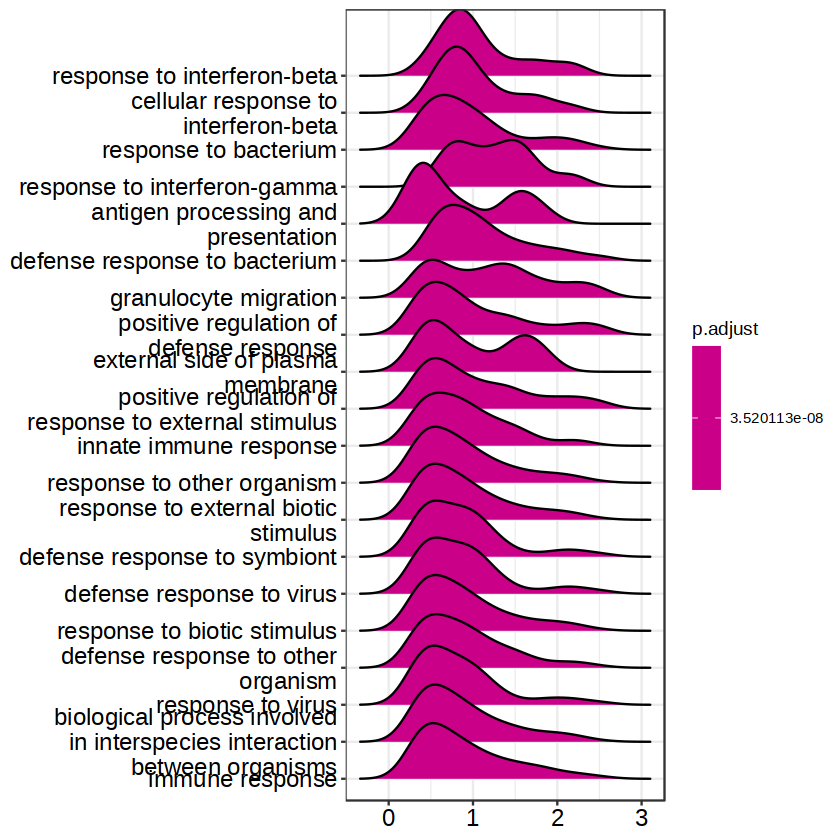

In [34]:
ridgeplot(gse, showCategory = 20)
ggsave("test.png", height=12, width=8)